# Problem Statement

A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 

Leads are captured in 2 ways - Directly and Indirectly. 

Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.

Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.

Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

# Solution

In [34]:
#Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Reading and Inspecting data

### 1.1 Reading data

In [14]:
# Reading the data
leads = pd.read_csv("C:/Users/hp/Desktop/Analytics Vidhya/train_wn75k28.csv")
leads.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


### 1.2 Basic inspection of data

In [15]:
# Checking the shape of the data
leads.shape

(39161, 19)

In [4]:
# Checking the info of data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

We can see that, there are few columns with missing values.

In [5]:
# Checking numerical columns of the data
leads.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## 2. Missing value treatment

In [6]:
# Checking the columns for number of unique values.
leads.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

In [16]:
# Removing the 'id' column as it has unique value for each row and will not be useful for model building.
leads = leads.drop('id', axis=1)

In [17]:
# Checking the percentage of missing values in columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64

### 2.1 Data imputation for missing values

In [18]:
# Imputing the missing values in 'signup_date' column.
leads['signup_date'] = leads['signup_date'].fillna(leads['created_at'])

- ### Imputing "0" for the missing values in "products_purchased" column

In [19]:
# Imputing the values in columns.
leads['products_purchased'] = leads['products_purchased'].fillna(0)

In [20]:
# Checking the percentage of missing values in columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

created_at              0.0
campaign_var_1          0.0
campaign_var_2          0.0
products_purchased      0.0
signup_date             0.0
user_activity_var_1     0.0
user_activity_var_2     0.0
user_activity_var_3     0.0
user_activity_var_4     0.0
user_activity_var_5     0.0
user_activity_var_6     0.0
user_activity_var_7     0.0
user_activity_var_8     0.0
user_activity_var_9     0.0
user_activity_var_10    0.0
user_activity_var_11    0.0
user_activity_var_12    0.0
buy                     0.0
dtype: float64

In [21]:
leads['products_purchased']=leads['products_purchased'].astype('int')

- #### Missing value treatment is done. Now, there are no missing values in any column.

In [22]:
leads.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,4,6,0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [23]:
# Checking the shape of data
leads.shape

(39161, 18)

## 3. Data Cleaning

- ### Converting the 'created_at' column to datetime datatype.

In [24]:
# Converting 'created_at' column to datetime object.
leads['created_at'] = pd.to_datetime(leads['created_at'], format = '%Y-%m-%d', errors = 'coerce')

In [25]:
# Converting 'signup_date' column to datetime object.
leads['signup_date'] = pd.to_datetime(leads['signup_date'], format = '%Y-%m-%d', errors = 'coerce')

In [26]:
# Checking the info of data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            39161 non-null  datetime64[ns]
 1   campaign_var_1        39161 non-null  int64         
 2   campaign_var_2        39161 non-null  int64         
 3   products_purchased    39161 non-null  int32         
 4   signup_date           39161 non-null  datetime64[ns]
 5   user_activity_var_1   39161 non-null  int64         
 6   user_activity_var_2   39161 non-null  int64         
 7   user_activity_var_3   39161 non-null  int64         
 8   user_activity_var_4   39161 non-null  int64         
 9   user_activity_var_5   39161 non-null  int64         
 10  user_activity_var_6   39161 non-null  int64         
 11  user_activity_var_7   39161 non-null  int64         
 12  user_activity_var_8   39161 non-null  int64         
 13  user_activity_va

- ### Creating 'Year', 'Month', 'Week' and 'Day' columns from 'created_at' column

In [27]:
leads['created_at_year'] = leads['created_at'].dt.year
leads['created_at_month'] = leads['created_at'].dt.month
leads['created_at_week'] = leads['created_at'].dt.week
leads['created_at_day'] = leads['created_at'].dt.day

In [28]:
leads.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_week,created_at_day
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,...,1,0,0,0,0,0,2021,1,53,1
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,...,0,0,0,0,0,0,2021,1,53,1
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,...,0,0,0,0,0,0,2021,1,53,1
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,...,0,0,0,0,0,0,2021,1,53,1
4,2021-01-01,4,6,0,2020-06-08,0,0,0,0,0,...,0,0,0,1,0,0,2021,1,53,1


In [32]:
leads['days_after_signup']=leads['created_at']-leads['signup_date']

In [33]:
leads['days_after_signup'].head()

0     99 days
1    104 days
2   -222 days
3   1185 days
4    207 days
Name: days_after_signup, dtype: timedelta64[ns]

In [39]:
leads['days_after_signup']=leads['days_after_signup'].astype('timedelta64[D]')

In [43]:
leads['days_after_signup']=leads['days_after_signup'].astype('int')

In [44]:
# Checking the info of data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            39161 non-null  datetime64[ns]
 1   campaign_var_1        39161 non-null  int64         
 2   campaign_var_2        39161 non-null  int64         
 3   products_purchased    39161 non-null  int32         
 4   signup_date           39161 non-null  datetime64[ns]
 5   user_activity_var_1   39161 non-null  int64         
 6   user_activity_var_2   39161 non-null  int64         
 7   user_activity_var_3   39161 non-null  int64         
 8   user_activity_var_4   39161 non-null  int64         
 9   user_activity_var_5   39161 non-null  int64         
 10  user_activity_var_6   39161 non-null  int64         
 11  user_activity_var_7   39161 non-null  int64         
 12  user_activity_var_8   39161 non-null  int64         
 13  user_activity_va

- ### Dropping 'created_at' column and 'created_at_year' column as it has only 1 unique value as the data for leads is year 2021.

In [45]:
# Dropping the 'created_at', 'signup_date' and 'created_at_year' columns.
leads = leads.drop('created_at', axis=1)
leads = leads.drop('created_at_year', axis=1)
leads = leads.drop('signup_date', axis=1)

In [46]:
leads.shape

(39161, 20)

## 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

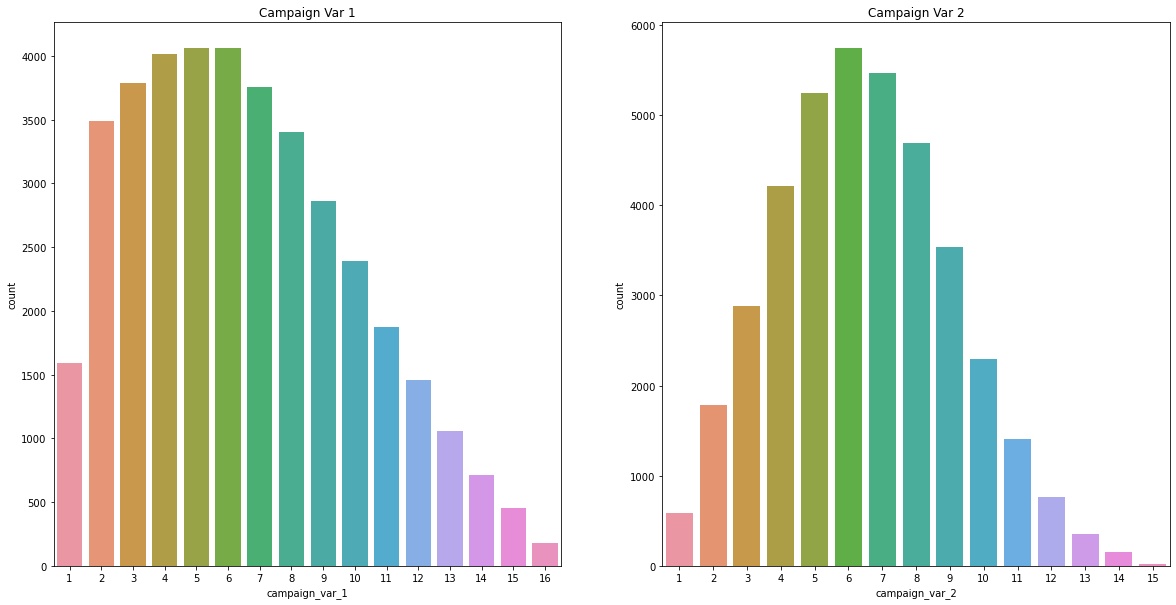

In [47]:
plt.figure(figsize = (20,10)) # Setting the figure size for ease of reading the plot

plt.subplot(1,2,1)  # Subplot for ease of comparing the plots
sns.countplot(leads['campaign_var_1'])
plt.title('Campaign Var 1')  # Setting the title for the plot

plt.subplot(1,2,2)  # Subplot for ease of comparing the plots
sns.countplot(leads['campaign_var_2'])
plt.title('Campaign Var 2')  # Setting the title for the plot

plt.show()

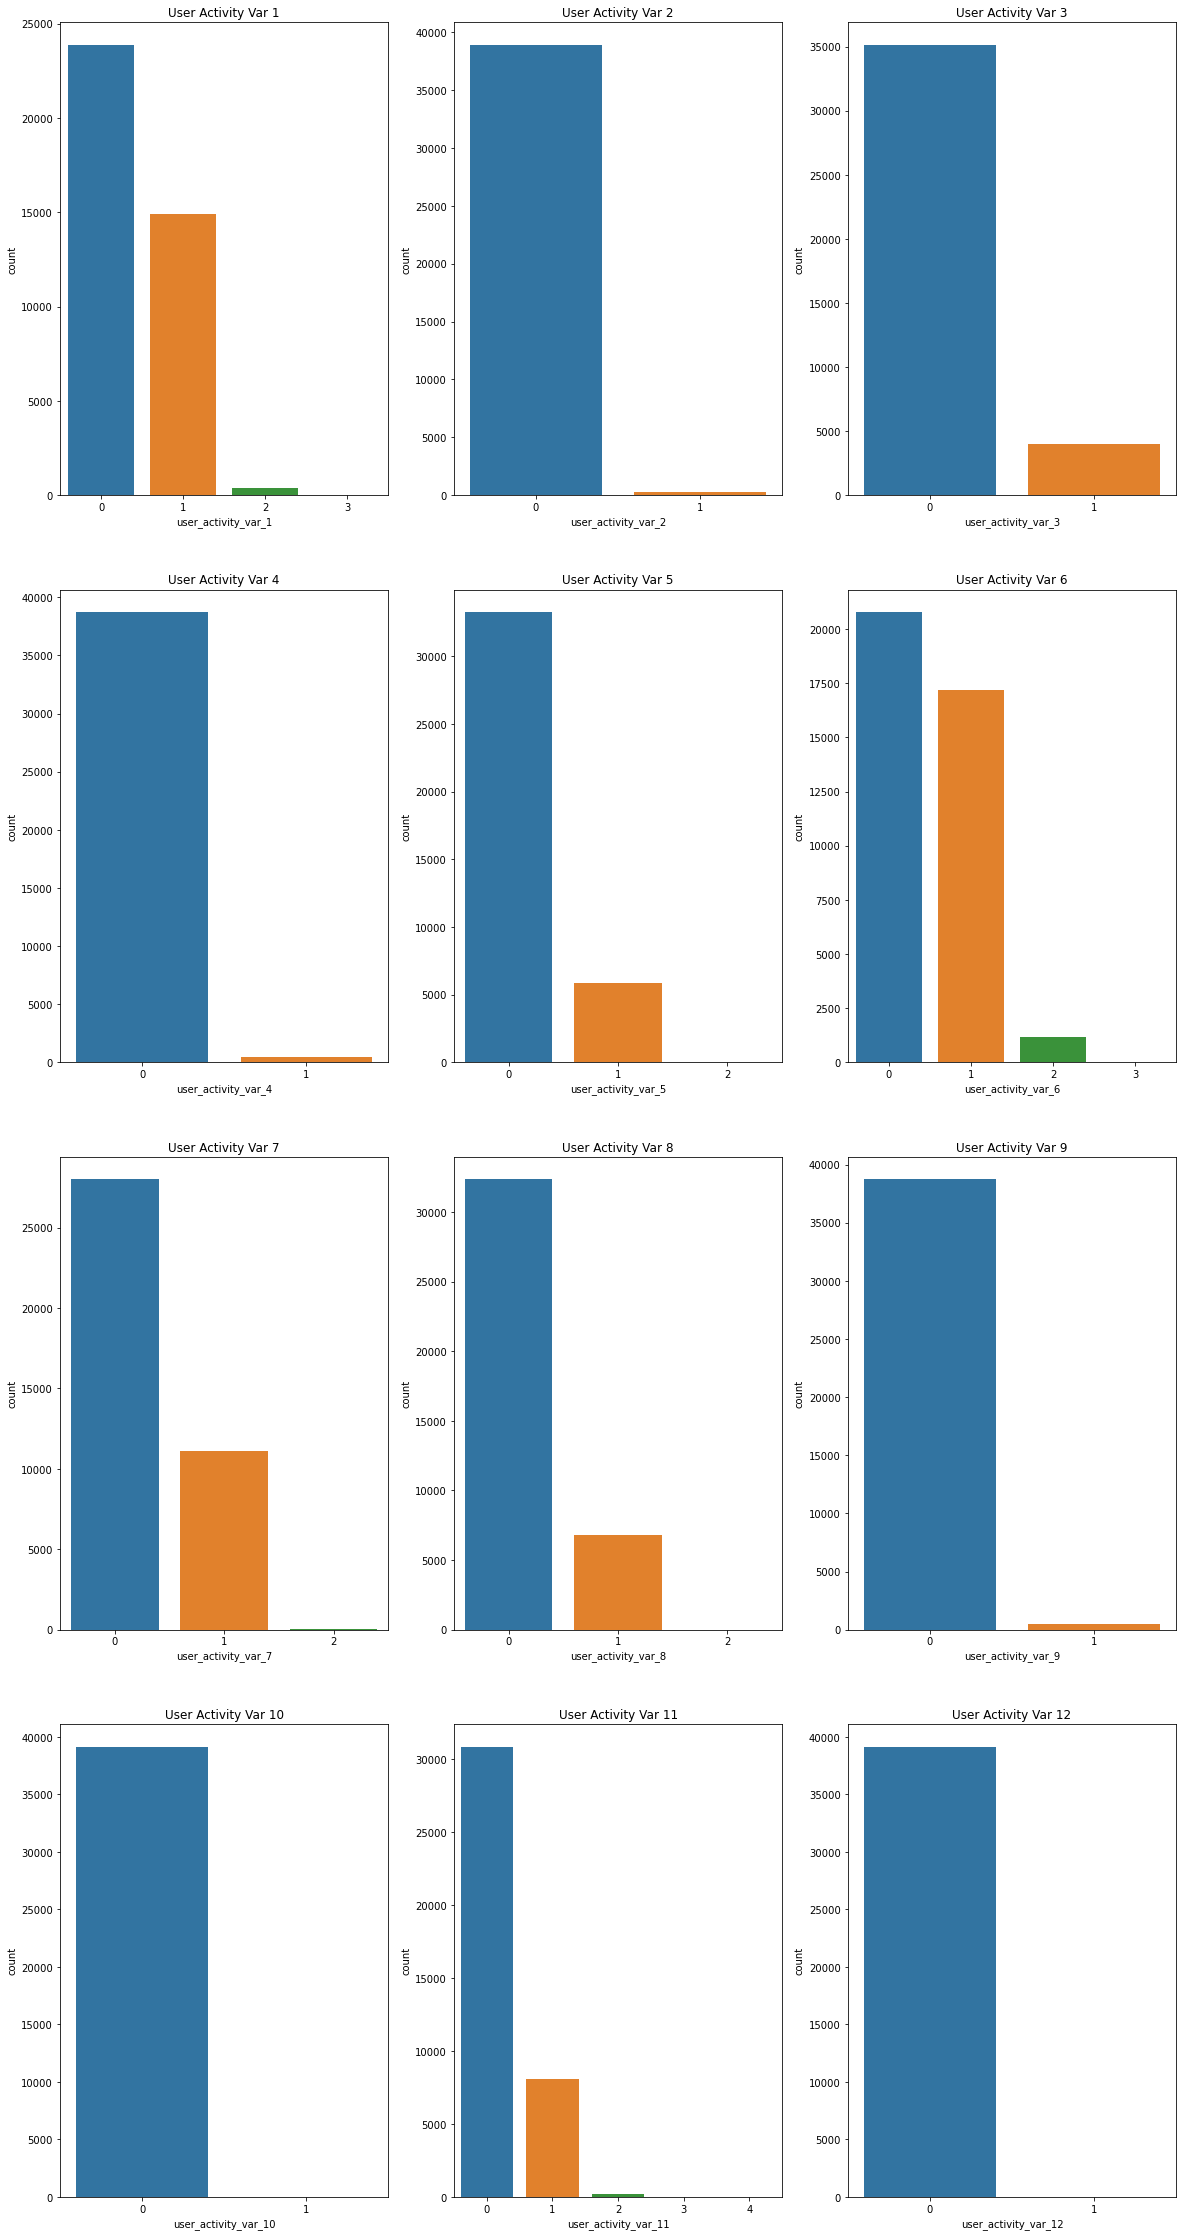

In [48]:
plt.figure(figsize = (20,40)) # Setting the figure size for ease of reading the plot

plt.subplot(4,3,1)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_1'])
plt.title('User Activity Var 1')  # Setting the title for the plot

plt.subplot(4,3,2)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_2'])
plt.title('User Activity Var 2')  # Setting the title for the plot

plt.subplot(4,3,3)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_3'])
plt.title('User Activity Var 3')  # Setting the title for the plot

plt.subplot(4,3,4)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_4'])
plt.title('User Activity Var 4')  # Setting the title for the plot

plt.subplot(4,3,5)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_5'])
plt.title('User Activity Var 5')  # Setting the title for the plot

plt.subplot(4,3,6)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_6'])
plt.title('User Activity Var 6')  # Setting the title for the plot

plt.subplot(4,3,7)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_7'])
plt.title('User Activity Var 7')  # Setting the title for the plot

plt.subplot(4,3,8)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_8'])
plt.title('User Activity Var 8')  # Setting the title for the plot

plt.subplot(4,3,9)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_9'])
plt.title('User Activity Var 9')  # Setting the title for the plot

plt.subplot(4,3,10)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_10'])
plt.title('User Activity Var 10')  # Setting the title for the plot

plt.subplot(4,3,11)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_11'])
plt.title('User Activity Var 11')  # Setting the title for the plot

plt.subplot(4,3,12)  # Subplot for ease of comparing the plots
sns.countplot(leads['user_activity_var_12'])
plt.title('User Activity Var 12')  # Setting the title for the plot

plt.show()

Text(0.5, 1.0, 'Created day of the month')

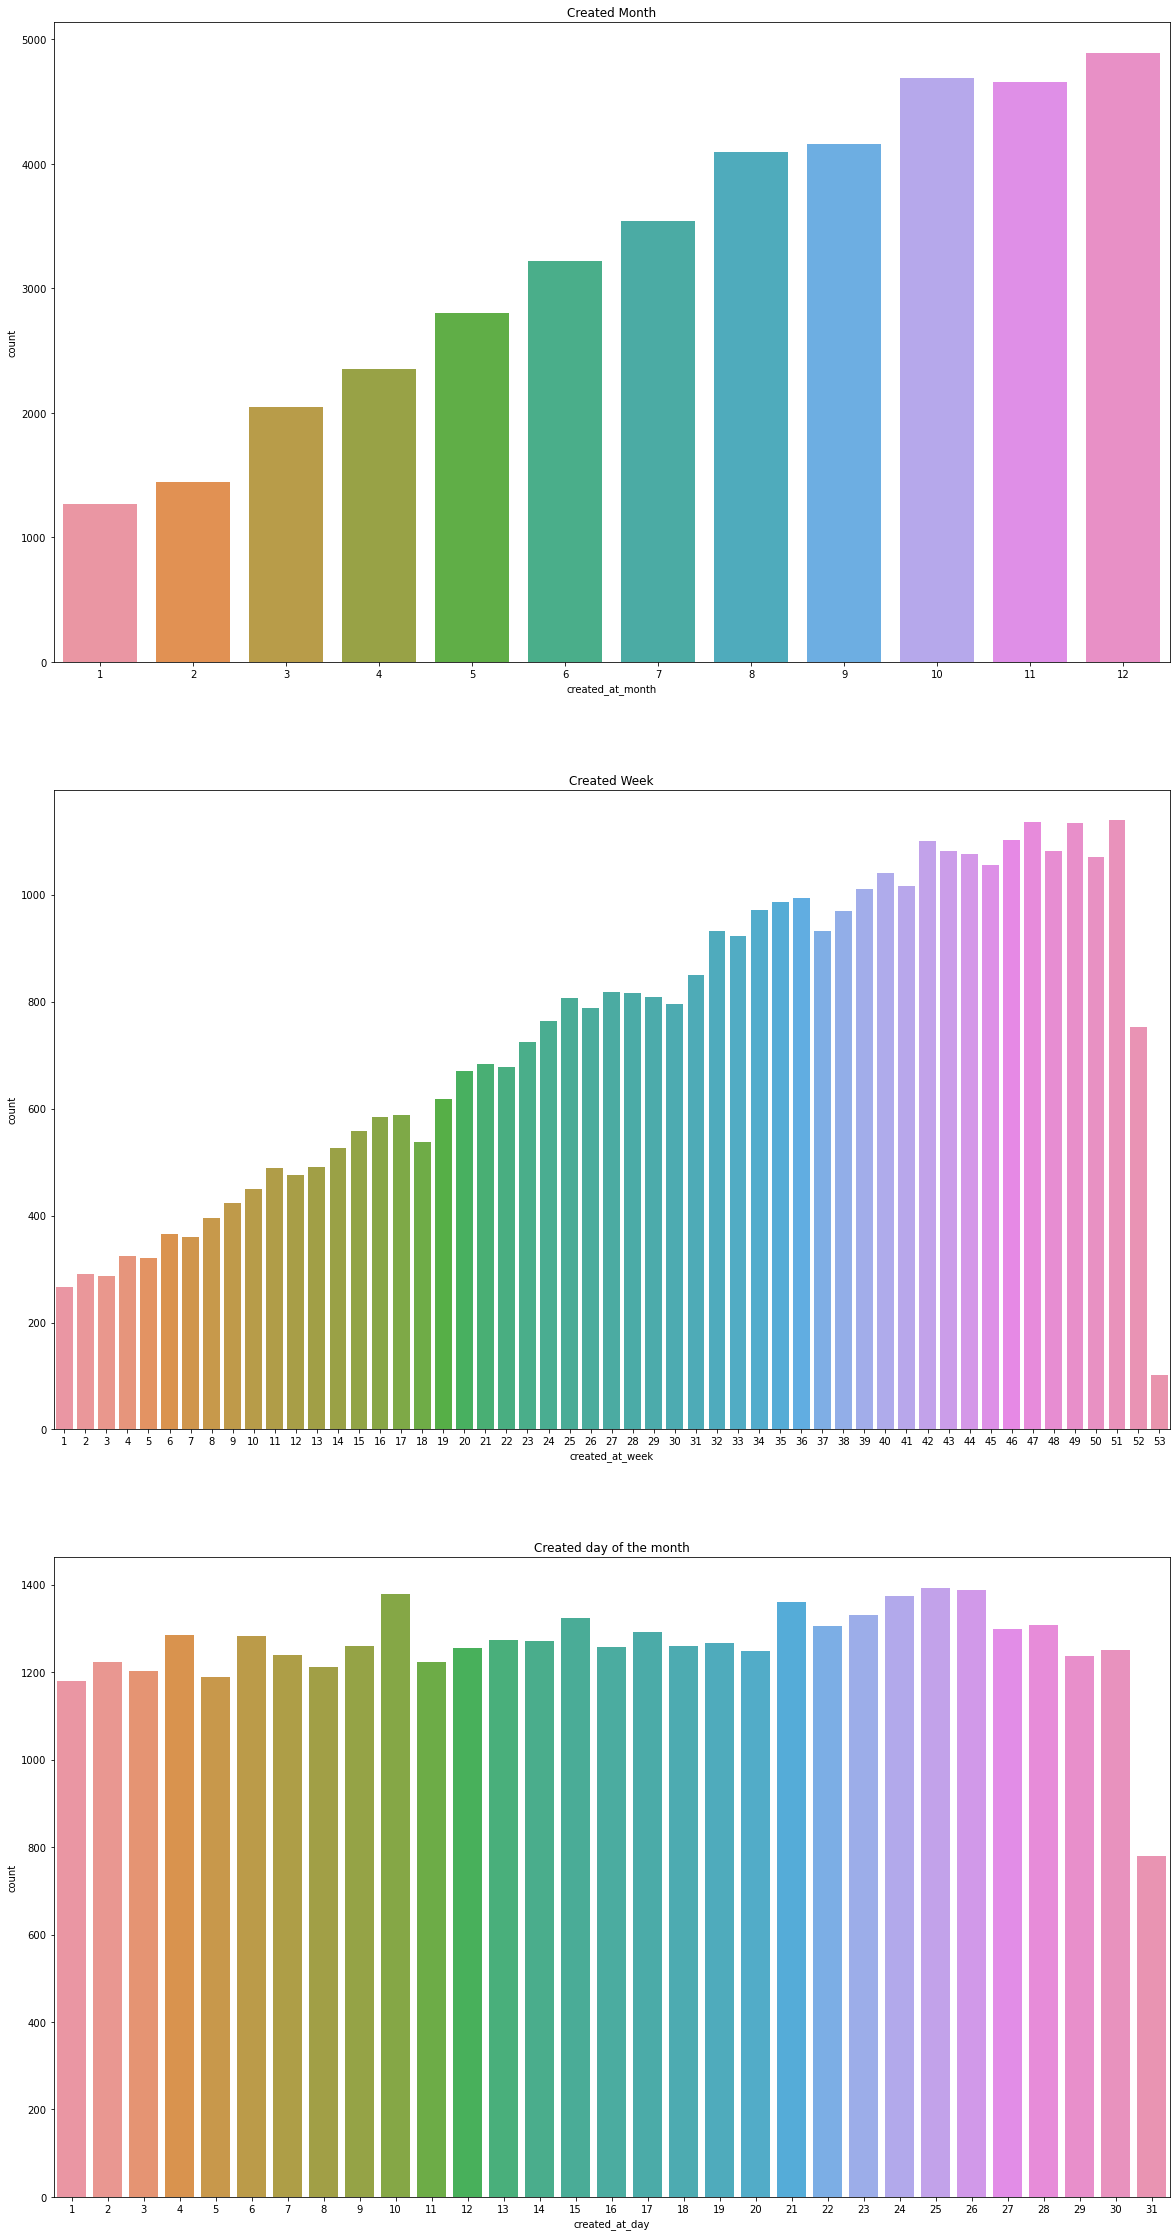

In [49]:
plt.figure(figsize = (20,40)) # Setting the figure size for ease of reading the plot

plt.subplot(3,1,1)  # Subplot for ease of comparing the plots
sns.countplot(leads['created_at_month'])
plt.title('Created Month')  # Setting the title for the plot

plt.subplot(3,1,2)  # Subplot for ease of comparing the plots
sns.countplot(leads['created_at_week'])
plt.title('Created Week')  # Setting the title for the plot

plt.subplot(3,1,3)  # Subplot for ease of comparing the plots
sns.countplot(leads['created_at_day'])
plt.title('Created day of the month')  # Setting the title for the plot

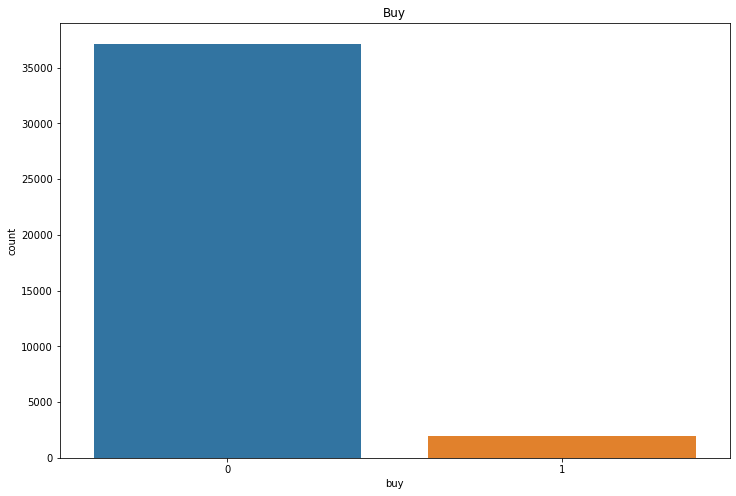

In [50]:
# Plot for target variable "Buy"
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(leads['buy'])  
plt.title('Buy')  # Setting the title for the plot
plt.show()

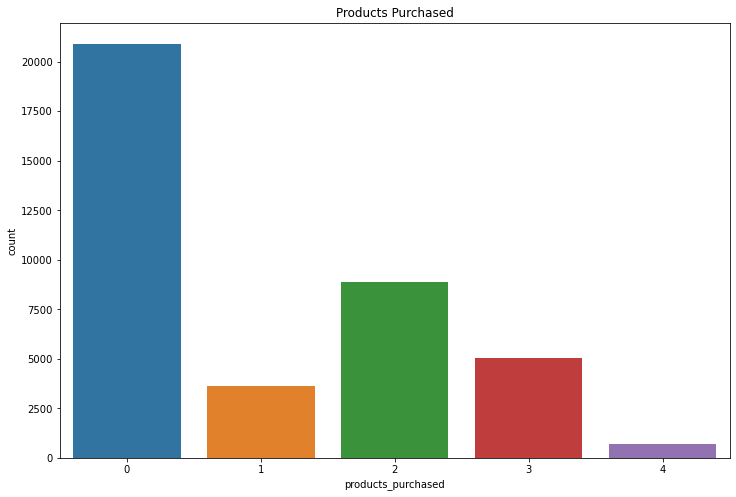

In [51]:
# Plot for target variable "products_purchased"
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(leads['products_purchased'])  
plt.title('Products Purchased')  # Setting the title for the plot
plt.show()

### 4.2 Variables based on Target variable

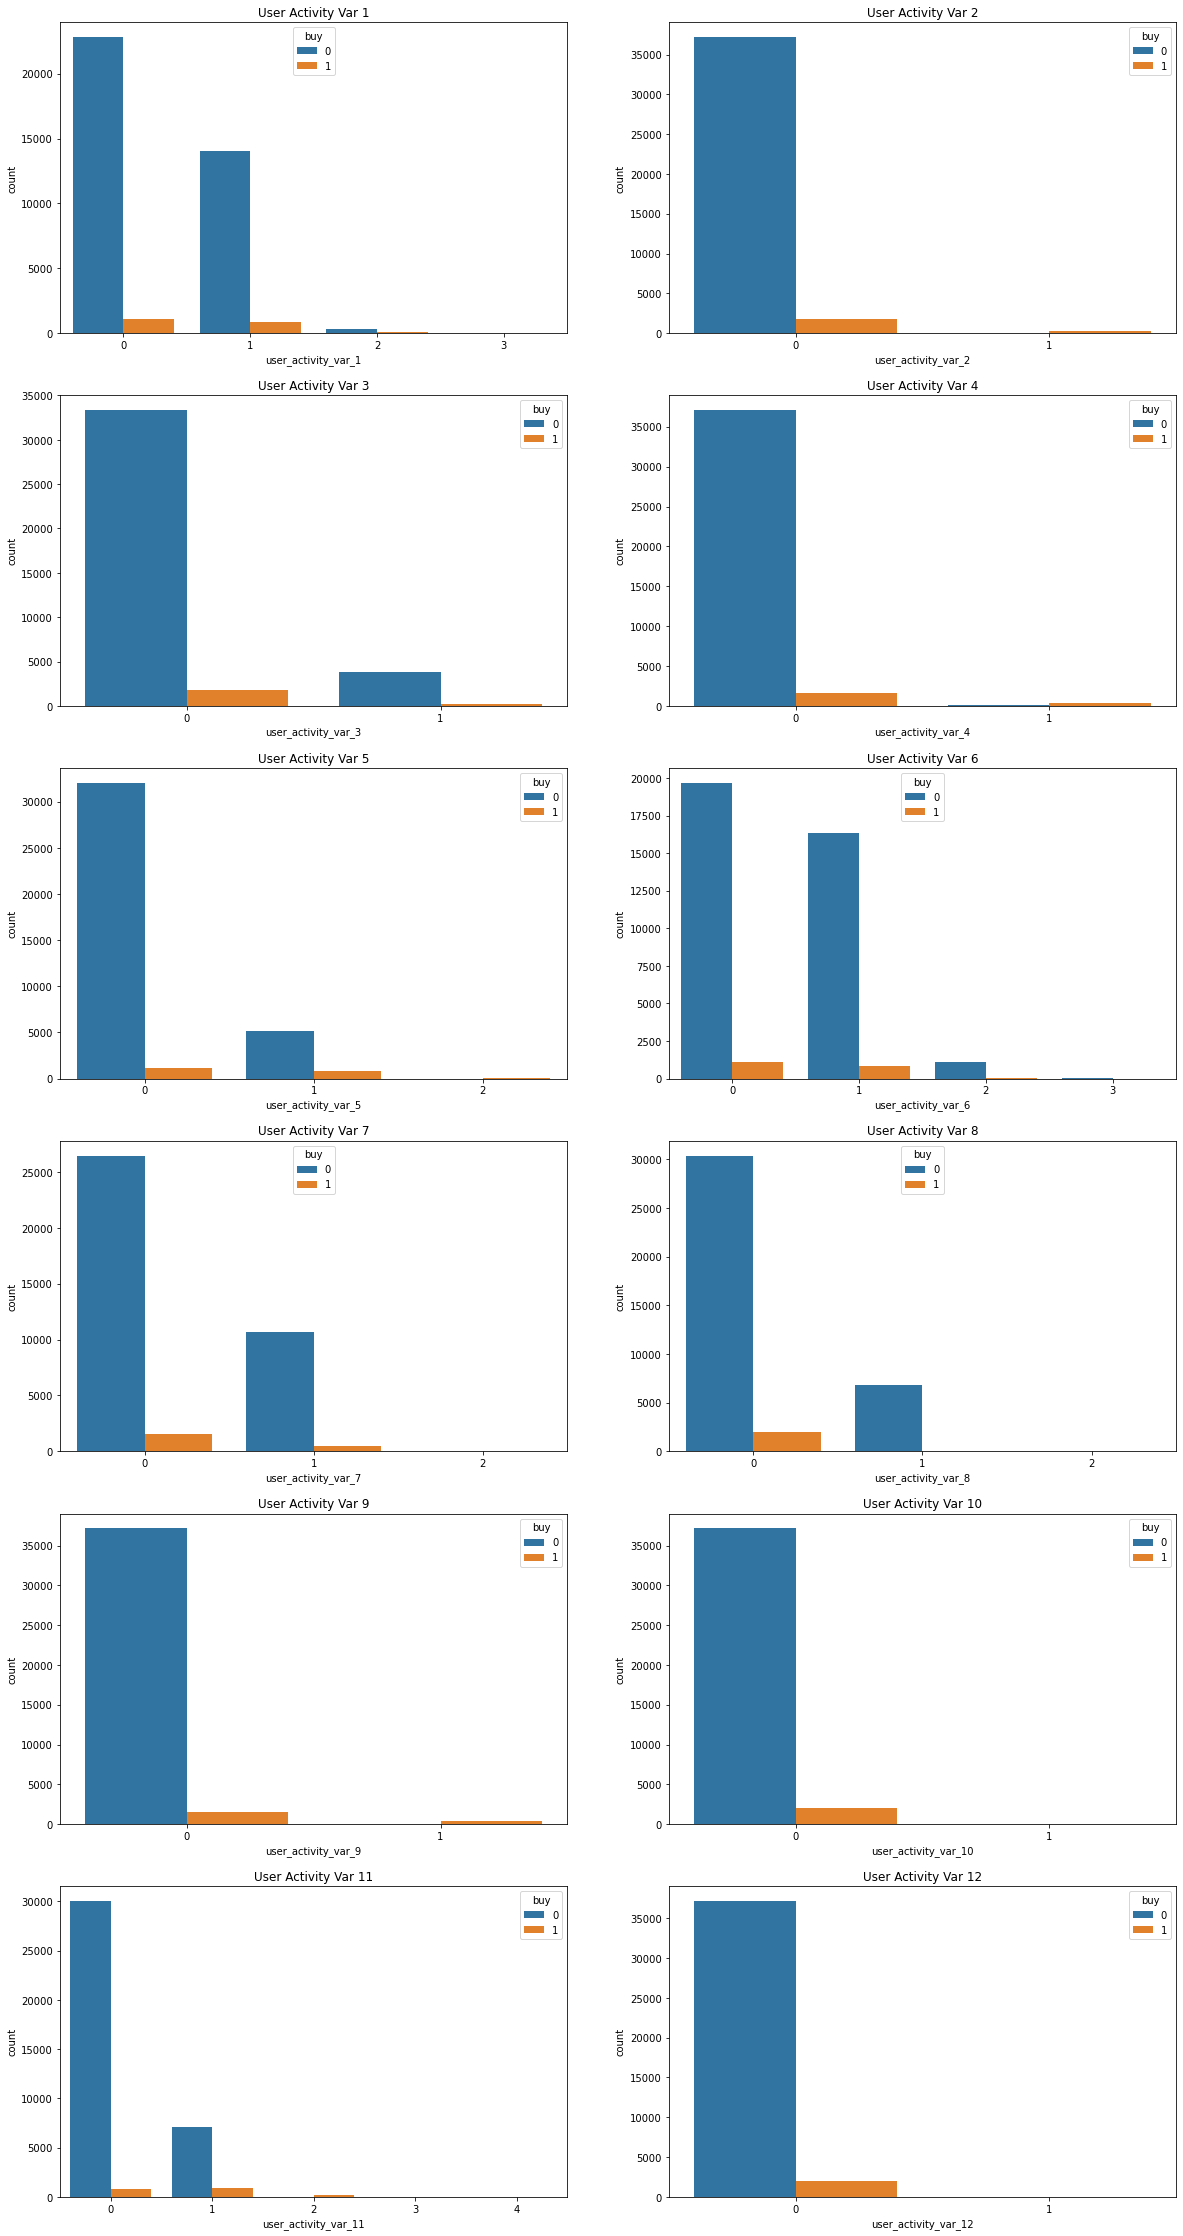

In [52]:
plt.figure(figsize = (20,40))  # Setting the figure size for ease of reading the plot

plt.subplot(6,2,1)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_1', hue='buy', data= leads)
plt.title('User Activity Var 1')  # Setting the title for the plot

plt.subplot(6,2,2)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_2', hue='buy', data= leads)
plt.title('User Activity Var 2')  # Setting the title for the plot

plt.subplot(6,2,3)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_3', hue='buy', data= leads)
plt.title('User Activity Var 3')  # Setting the title for the plot

plt.subplot(6,2,4)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_4', hue='buy', data= leads)
plt.title('User Activity Var 4')  # Setting the title for the plot

plt.subplot(6,2,5)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_5', hue='buy', data= leads)
plt.title('User Activity Var 5')  # Setting the title for the plot

plt.subplot(6,2,6)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_6', hue='buy', data= leads)
plt.title('User Activity Var 6')  # Setting the title for the plot

plt.subplot(6,2,7)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_7', hue='buy', data= leads)
plt.title('User Activity Var 7')  # Setting the title for the plot

plt.subplot(6,2,8)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_8', hue='buy', data= leads)
plt.title('User Activity Var 8')  # Setting the title for the plot

plt.subplot(6,2,9)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_9', hue='buy', data= leads)
plt.title('User Activity Var 9')  # Setting the title for the plot

plt.subplot(6,2,10)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_10', hue='buy', data= leads)
plt.title('User Activity Var 10')  # Setting the title for the plot

plt.subplot(6,2,11)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_11', hue='buy', data= leads)
plt.title('User Activity Var 11')  # Setting the title for the plot

plt.subplot(6,2,12)  # Subplot for ease of comparing the plots
sns.countplot(x='user_activity_var_12', hue='buy', data= leads)
plt.title('User Activity Var 12')  # Setting the title for the plot

plt.show()

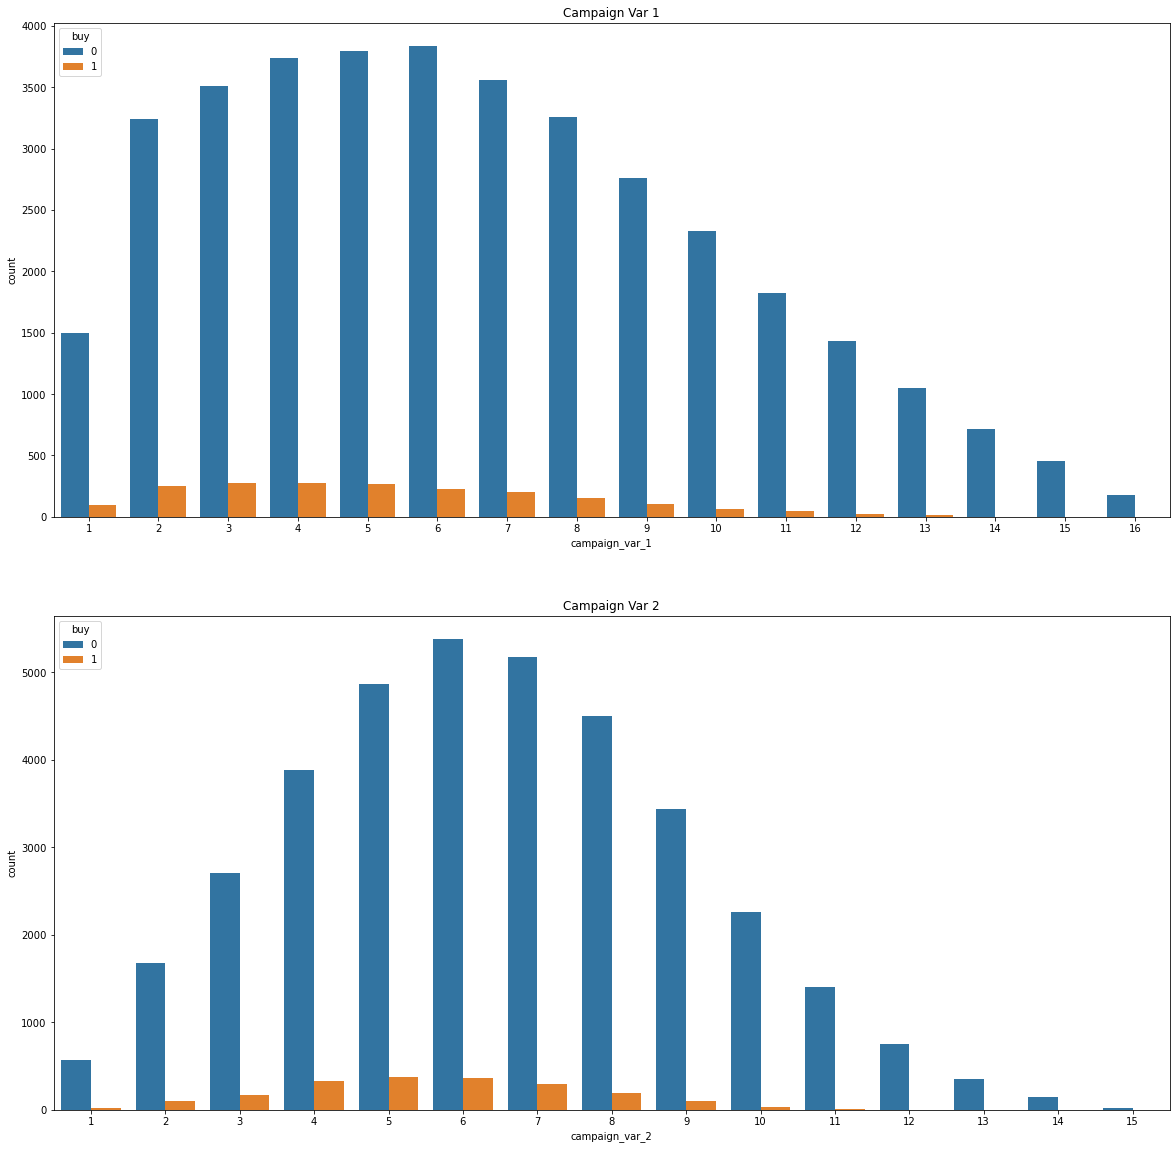

In [53]:
plt.figure(figsize = (20,20))  # Setting the figure size for ease of reading the plot

plt.subplot(2,1,1)  # Subplot for ease of comparing the plots
sns.countplot(x='campaign_var_1', hue='buy', data= leads)
plt.title('Campaign Var 1')  # Setting the title for the plot

plt.subplot(2,1,2)  # Subplot for ease of comparing the plots
sns.countplot(x='campaign_var_2', hue='buy', data= leads)
plt.title('Campaign Var 2')  # Setting the title for the plot

plt.show()

Text(0.5, 1.0, 'Created day of the month')

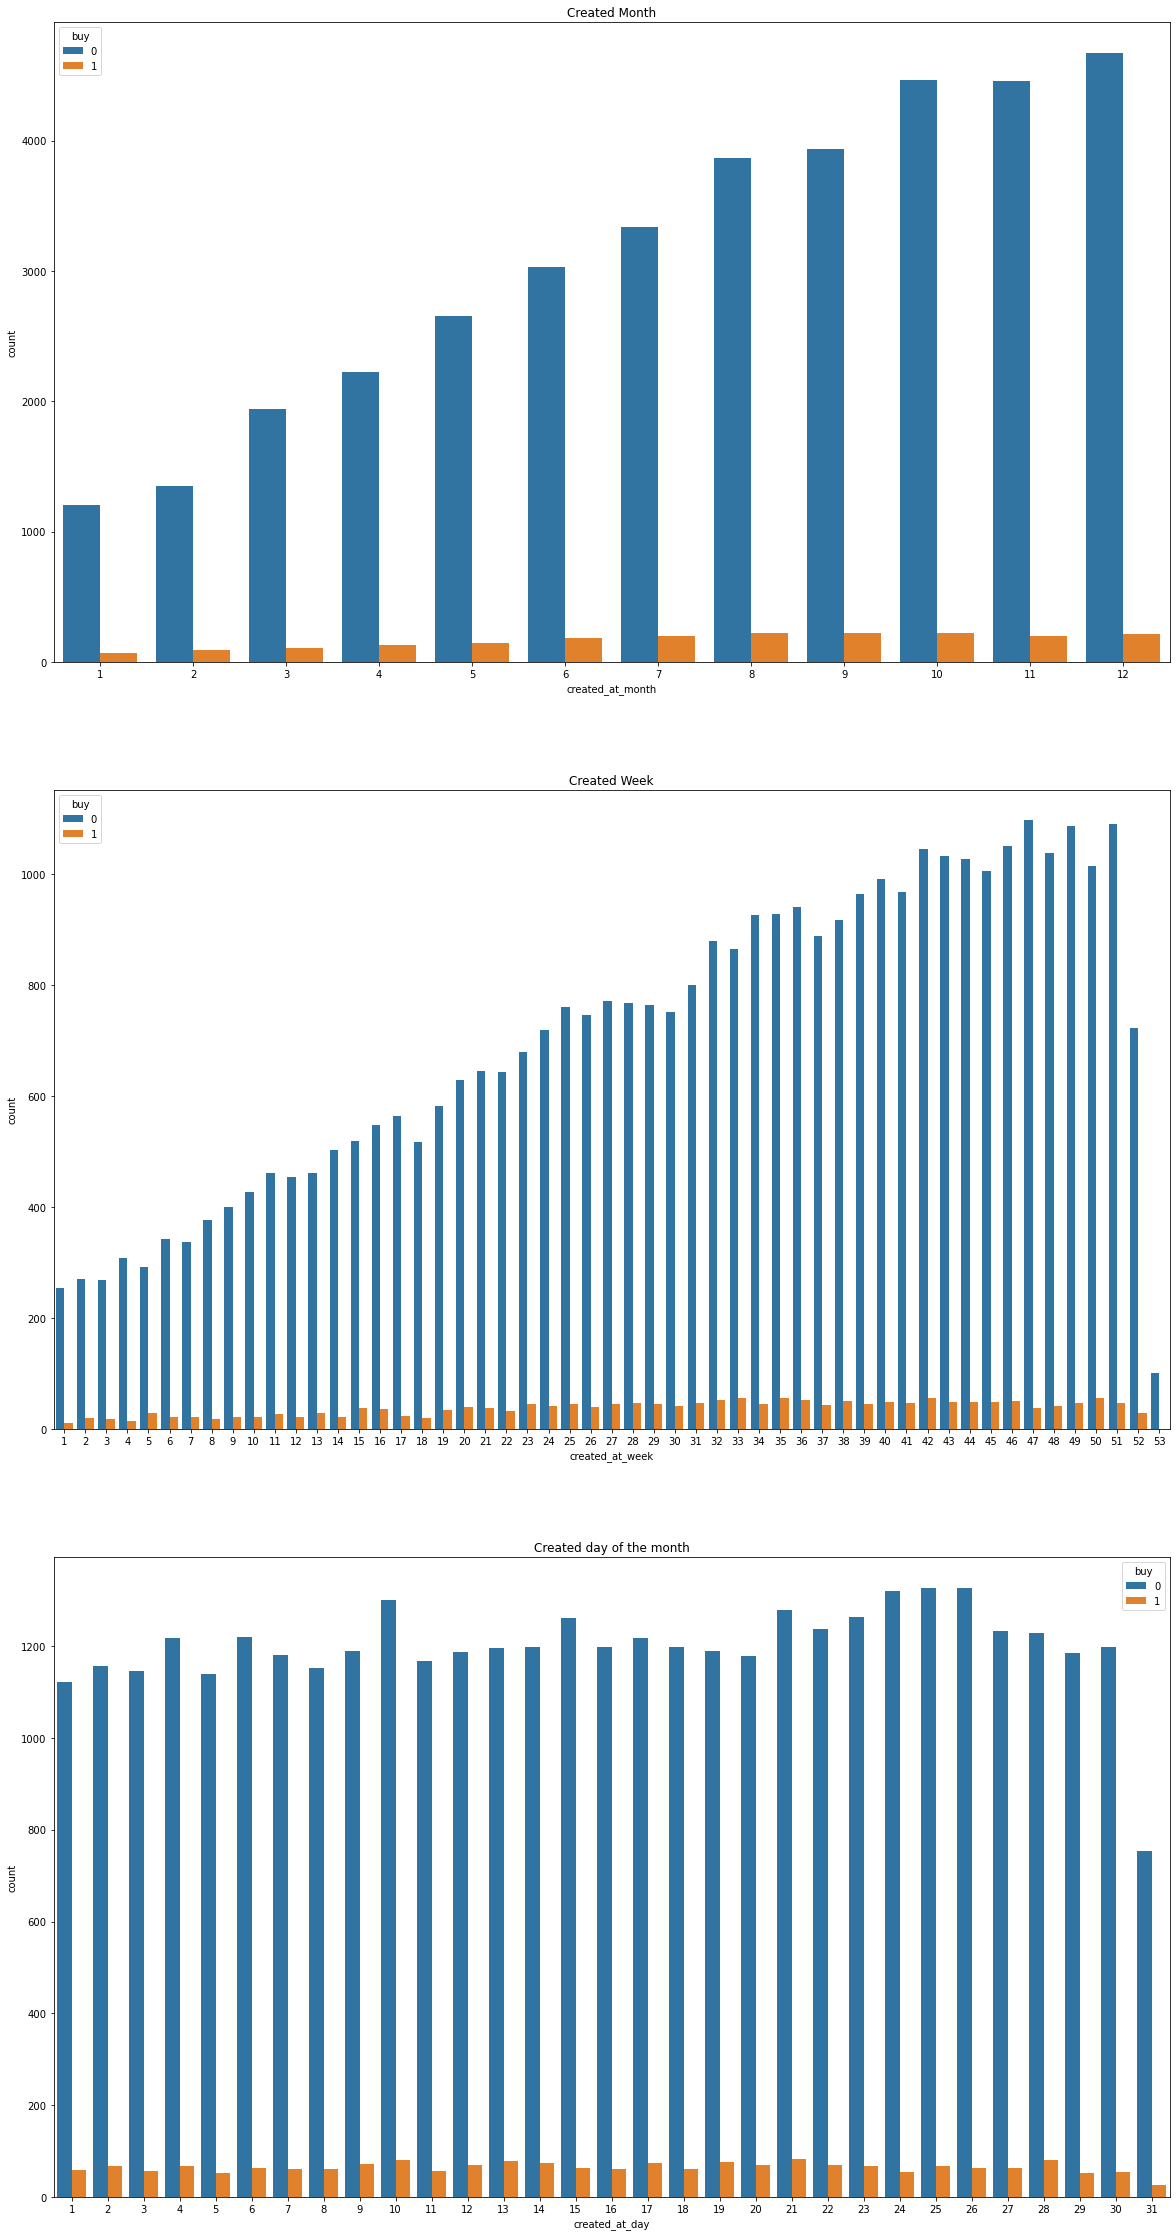

In [54]:
plt.figure(figsize = (20,40)) # Setting the figure size for ease of reading the plot

plt.subplot(3,1,1)  # Subplot for ease of comparing the plots
sns.countplot(leads['created_at_month'], hue='buy', data= leads)
plt.title('Created Month')  # Setting the title for the plot

plt.subplot(3,1,2)  # Subplot for ease of comparing the plots
sns.countplot(leads['created_at_week'], hue='buy', data= leads)
plt.title('Created Week')  # Setting the title for the plot

plt.subplot(3,1,3)  # Subplot for ease of comparing the plots
sns.countplot(leads['created_at_day'], hue='buy', data= leads)
plt.title('Created day of the month')  # Setting the title for the plot

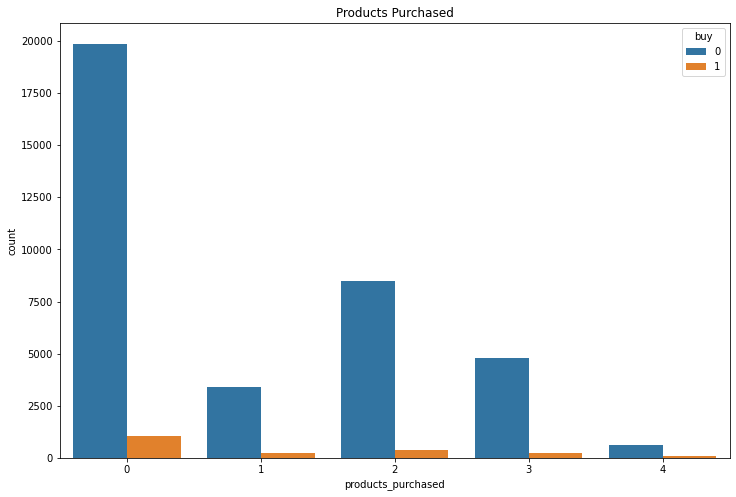

In [55]:
# Plot for target variable "products_purchased"
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(leads['products_purchased'], hue='buy', data= leads)  
plt.title('Products Purchased')  # Setting the title for the plot
plt.show()

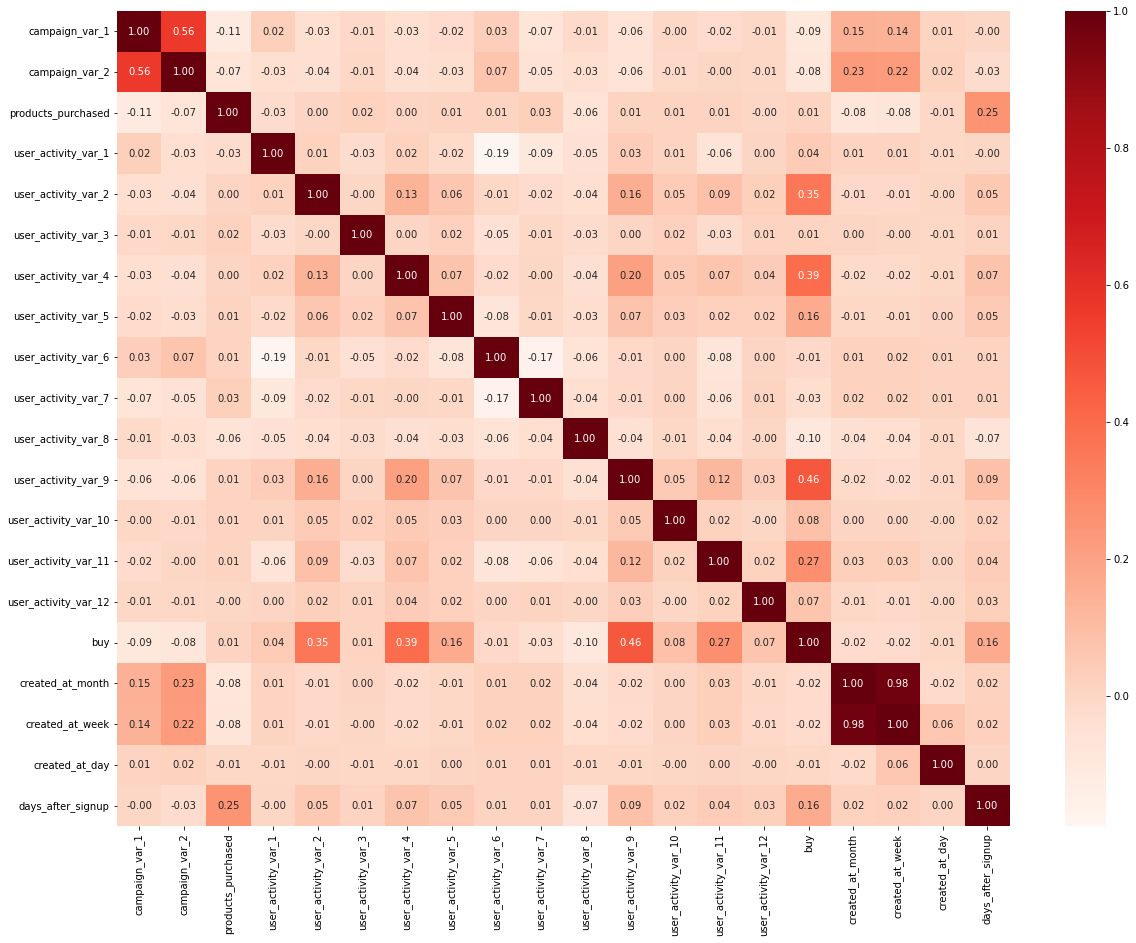

In [56]:
# Checking the correlation among the variables
plt.figure(figsize=(20,15))   # Setting the figure size for ease of reading the plot
sns.heatmap(leads.corr(), cmap='Reds', annot=True, fmt='.2f')
plt.show()

## 5. Creating X_train and y_train dataframes

In [57]:
X_train = leads.drop(['buy'], axis=1)
X_train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_month,created_at_week,created_at_day,days_after_signup
0,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,1,53,1,99
1,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,1,53,1,104
2,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,1,53,1,-222
3,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1,53,1,1185
4,4,6,0,0,0,0,0,0,0,1,0,0,0,1,0,1,53,1,207


In [58]:
y_train = leads['buy']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: buy, dtype: int64

In [59]:
# Importing  MinMax scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()
X_train[['campaign_var_1', 'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_11', 'created_at_month', 'created_at_week', 'created_at_day', 'days_after_signup']] = scaler.fit_transform(X_train[['campaign_var_1', 'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_11', 'created_at_month', 'created_at_week', 'created_at_day', 'days_after_signup']])
X_train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_month,created_at_week,created_at_day,days_after_signup
0,0.000000,0.071429,0.50,0.000000,0,0,0,0.0,0.0,0.5,0.5,0,0,0.00,0,0.0,1.0,0.0,0.194633
1,0.066667,0.000000,0.50,0.333333,0,1,0,0.0,0.0,0.5,0.0,0,0,0.00,0,0.0,1.0,0.0,0.196422
2,0.533333,0.142857,0.75,0.333333,0,0,0,0.0,0.0,0.0,0.0,0,0,0.00,0,0.0,1.0,0.0,0.079785
3,0.333333,0.428571,0.50,0.000000,0,0,0,0.0,0.0,0.0,0.0,0,0,0.00,0,0.0,1.0,0.0,0.583184
4,0.200000,0.357143,0.00,0.000000,0,0,0,0.0,0.0,0.5,0.0,0,0,0.25,0,0.0,1.0,0.0,0.233274


## 6. Model building

In [61]:
# Importing 'LogisticRegression' from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
# Importing statsmodels as sm
import statsmodels.api as sm

In [63]:
# Importing 'variance_inflation_factor' from 'statsmodels' library.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_df_vif(local_df):
    df_vif = pd.DataFrame()
    df_vif['Features'] = local_df.columns
    df_vif['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif = df_vif.sort_values(by='VIF', ascending=False)
    df_vif = df_vif.reset_index(drop=True)
    return df_vif

### 6.1 First Model

In [64]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39141
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3659.3
Date:                Mon, 06 Jun 2022   Deviance:                       7318.6
Time:                        09:44:42   Pearson chi2:                 4.09e+04
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.2953      0.191    -27.691      0.000      -5.670      -4.920
campaign_var_1          -1.5372      0.192     -8.026      0.000      -1.913      -1.162
campaign_var_2          -0.6939      0.230     -3.016      0.003      -1.145      -0.243
products_purchased      -0.8404      0.119     -7.087      0.000      -1.073      -0.608
user_activity_var_1      1.8066      0.196      9.228      0.000       1.423       2.190
user_activity_var_2     29.9279   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
user_activity_var_3      0.0487      0.110      0.440      0.660      -0.168       0.265
user_activity_var_4      5.1441      0.179     28.764      0.000       4.794       5.495
user_activity_var_5      2.9159      0.141     20.620      0.000       2.639       3.193
user_activity_var_6      1.1138      0.188      5.930      0.000       0.746       1.482
user_activity_var_7     -0.2786      0.160     -1.742      0.081      -0.592       0.035
user_activity_var_8     -5.4564      0.549     -9.944      0.000      -6.532      -4.381
user_activity_var_9     30.0484   1.93e+04      0.002      0.999   -3.78e+04    3.79e+04
user_activity_var_10    28.7856   9.66e+04      0.000      1.000   -1.89e+05    1.89e+05
user_activity_var_11     8.9174      0.255     34.923      0.000       8.417       9.418
user_activity_var_12     4.0553      0.769      5.270      0.000       2.547       5.563
created_at_month         7.6076      5.239      1.452      0.147      -2.661      17.877
created_at_week         -8.5488      5.687     -1.503      0.133     -19.696       2.598
created_at_day           0.5837      0.482      1.212      0.226      -0.360       1.528
days_after_signup        4.6081      0.227     20.296      0.000       4.163       5.053
========================================================================================
"""

In [65]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,created_at_month,25.90
1,created_at_week,25.89
2,const,19.77
3,campaign_var_2,1.52
4,campaign_var_1,1.48
5,created_at_day,1.15
6,user_activity_var_6,1.11
7,user_activity_var_9,1.09
8,days_after_signup,1.09
9,products_purchased,1.09


- #### From the model we can see that, 'user_activity_var_10' has P-value 1.00. As columns with P-value greater than 0.05 can be dropped, we will drop this column.

In [66]:
# Dropping 'user_activity_var_10' as it has a high P-value
X_train.drop('user_activity_var_10', axis = 1, inplace = True)

### 6.2 Second Model

In [67]:
# Refit the model with the new set of features
X_train_sm2 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39142
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3675.9
Date:                Mon, 06 Jun 2022   Deviance:                       7351.7
Time:                        09:45:18   Pearson chi2:                 4.08e+04
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.3046      0.192    -27.670      0.000      -5.680      -4.929
campaign_var_1          -1.5407      0.191     -8.064      0.000      -1.915      -1.166
campaign_var_2          -0.7112      0.230     -3.098      0.002      -1.161      -0.261
products_purchased      -0.8285      0.118     -7.014      0.000      -1.060      -0.597
user_activity_var_1      1.8036      0.195      9.237      0.000       1.421       2.186
user_activity_var_2     29.9327   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
user_activity_var_3      0.0533      0.110      0.485      0.628      -0.162       0.269
user_activity_var_4      5.1446      0.178     28.825      0.000       4.795       5.494
user_activity_var_5      2.9156      0.141     20.675      0.000       2.639       3.192
user_activity_var_6      1.1044      0.187      5.893      0.000       0.737       1.472
user_activity_var_7     -0.2682      0.159     -1.684      0.092      -0.580       0.044
user_activity_var_8     -5.4688      0.549     -9.968      0.000      -6.544      -4.394
user_activity_var_9     30.0478   1.93e+04      0.002      0.999   -3.79e+04    3.79e+04
user_activity_var_11     8.9189      0.255     35.005      0.000       8.419       9.418
user_activity_var_12     4.0543      0.770      5.265      0.000       2.545       5.564
created_at_month         8.2348      5.287      1.558      0.119      -2.127      18.597
created_at_week         -9.2114      5.739     -1.605      0.108     -20.459       2.036
created_at_day           0.6293      0.486      1.296      0.195      -0.323       1.581
days_after_signup        4.6119      0.226     20.367      0.000       4.168       5.056
========================================================================================
"""

In [68]:
# Calculating the VIF
get_df_vif(X_train_sm2)

,Features,VIF
0,created_at_month,25.90
1,created_at_week,25.89
2,const,19.77
3,campaign_var_2,1.52
4,campaign_var_1,1.48
5,created_at_day,1.15
6,user_activity_var_6,1.11
7,user_activity_var_9,1.09
8,products_purchased,1.09
9,days_after_signup,1.09


- #### From the model we can see that, 'user_activity_var_2' has P-value 0.999. As columns with P-value greater than 0.05 can be dropped, we will drop this column.

In [69]:
# Dropping 'user_activity_var_2' as it has a high P-value
X_train.drop('user_activity_var_2', axis = 1, inplace = True)

### 6.3 Third Model

In [70]:
# Refit the model with the new set of features
X_train_sm3 = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39143
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4115.0
Date:                Mon, 06 Jun 2022   Deviance:                       8230.0
Time:                        09:46:18   Pearson chi2:                 3.99e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.0904      0.180    -28.299      0.000      -5.443      -4.738
campaign_var_1          -1.5287      0.179     -8.532      0.000      -1.880      -1.178
campaign_var_2          -0.8239      0.216     -3.818      0.000      -1.247      -0.401
products_purchased      -0.8210      0.110     -7.446      0.000      -1.037      -0.605
user_activity_var_1      1.7254      0.183      9.423      0.000       1.366       2.084
user_activity_var_3      0.0456      0.103      0.441      0.659      -0.157       0.248
user_activity_var_4      5.0793      0.174     29.241      0.000       4.739       5.420
user_activity_var_5      2.9119      0.132     21.986      0.000       2.652       3.171
user_activity_var_6      1.0768      0.175      6.137      0.000       0.733       1.421
user_activity_var_7     -0.3984      0.151     -2.643      0.008      -0.694      -0.103
user_activity_var_8     -5.5054      0.514    -10.703      0.000      -6.514      -4.497
user_activity_var_9     29.1294   1.26e+04      0.002      0.998   -2.47e+04    2.47e+04
user_activity_var_11     8.6957      0.238     36.529      0.000       8.229       9.162
user_activity_var_12     3.8988      0.765      5.098      0.000       2.400       5.398
created_at_month         9.1914      4.993      1.841      0.066      -0.595      18.978
created_at_week        -10.2735      5.420     -1.895      0.058     -20.897       0.350
created_at_day           0.7635      0.458      1.666      0.096      -0.135       1.662
days_after_signup        4.6421      0.213     21.807      0.000       4.225       5.059
========================================================================================
"""

In [71]:
# Calculating the VIF
get_df_vif(X_train_sm3)

,Features,VIF
0,created_at_month,25.90
1,created_at_week,25.89
2,const,19.77
3,campaign_var_2,1.52
4,campaign_var_1,1.48
5,created_at_day,1.15
6,user_activity_var_6,1.11
7,days_after_signup,1.09
8,products_purchased,1.09
9,user_activity_var_1,1.08


- #### From the model we can see that, 'user_activity_var_9' has P-value 0.998. As columns with P-value greater than 0.05 can be dropped, we will drop this column.

In [72]:
# Dropping 'user_activity_var_9' as it has a high P-value
X_train.drop('user_activity_var_9', axis = 1, inplace = True)

### 6.4 Fourth Model

In [73]:
# Refit the model with the new set of features
X_train_sm4 = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial())
model4 = logm4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39144
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4857.2
Date:                Mon, 06 Jun 2022   Deviance:                       9714.5
Time:                        09:46:47   Pearson chi2:                 4.05e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.6960      0.153    -30.716      0.000      -4.996      -4.396
campaign_var_1          -1.6696      0.164    -10.160      0.000      -1.992      -1.348
campaign_var_2          -1.0384      0.197     -5.261      0.000      -1.425      -0.652
products_purchased      -0.7780      0.099     -7.834      0.000      -0.973      -0.583
user_activity_var_1      1.9392      0.165     11.737      0.000       1.615       2.263
user_activity_var_3      0.0679      0.093      0.734      0.463      -0.114       0.249
user_activity_var_4      5.1480      0.165     31.123      0.000       4.824       5.472
user_activity_var_5      2.8971      0.121     24.003      0.000       2.661       3.134
user_activity_var_6      0.9821      0.160      6.150      0.000       0.669       1.295
user_activity_var_7     -0.3565      0.135     -2.633      0.008      -0.622      -0.091
user_activity_var_8     -5.1276      0.418    -12.266      0.000      -5.947      -4.308
user_activity_var_11     8.6646      0.215     40.303      0.000       8.243       9.086
user_activity_var_12     3.6513      0.759      4.808      0.000       2.163       5.140
created_at_month         5.8147      3.836      1.516      0.130      -1.704      13.334
created_at_week         -6.6443      4.164     -1.596      0.111     -14.806       1.517
created_at_day           0.4327      0.355      1.218      0.223      -0.263       1.129
days_after_signup        4.7588      0.194     24.577      0.000       4.379       5.138
========================================================================================
"""

In [74]:
# Calculating the VIF
get_df_vif(X_train_sm4)

,Features,VIF
0,created_at_month,25.90
1,created_at_week,25.89
2,const,19.77
3,campaign_var_2,1.52
4,campaign_var_1,1.48
5,created_at_day,1.15
6,user_activity_var_6,1.11
7,products_purchased,1.09
8,days_after_signup,1.08
9,user_activity_var_7,1.07


- #### From the model we can see that, 'user_activity_var_3' has P-value 0.463. As columns with P-value greater than 0.05 can be dropped, we will drop this column.

In [75]:
# Dropping 'user_activity_var_3' as it has a high P-value
X_train.drop('user_activity_var_3', axis = 1, inplace = True)

### 6.5 Fifth Model

In [76]:
# Refit the model with the new set of features
X_train_sm5 = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial())
model5 = logm5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39145
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4857.5
Date:                Mon, 06 Jun 2022   Deviance:                       9715.0
Time:                        09:47:49   Pearson chi2:                 4.04e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.6885      0.153    -30.715      0.000      -4.988      -4.389
campaign_var_1          -1.6705      0.164    -10.166      0.000      -1.993      -1.348
campaign_var_2          -1.0383      0.197     -5.261      0.000      -1.425      -0.651
products_purchased      -0.7772      0.099     -7.827      0.000      -0.972      -0.583
user_activity_var_1      1.9348      0.165     11.720      0.000       1.611       2.258
user_activity_var_4      5.1472      0.165     31.121      0.000       4.823       5.471
user_activity_var_5      2.9006      0.121     24.053      0.000       2.664       3.137
user_activity_var_6      0.9759      0.159      6.120      0.000       0.663       1.288
user_activity_var_7     -0.3570      0.135     -2.637      0.008      -0.622      -0.092
user_activity_var_8     -5.1323      0.418    -12.278      0.000      -5.952      -4.313
user_activity_var_11     8.6589      0.215     40.312      0.000       8.238       9.080
user_activity_var_12     3.6641      0.759      4.828      0.000       2.177       5.151
created_at_month         5.8341      3.846      1.517      0.129      -1.703      13.371
created_at_week         -6.6642      4.174     -1.596      0.110     -14.846       1.517
created_at_day           0.4339      0.356      1.219      0.223      -0.264       1.132
days_after_signup        4.7615      0.194     24.596      0.000       4.382       5.141
========================================================================================
"""

In [77]:
# Calculating the VIF
get_df_vif(X_train_sm5)

,Features,VIF
0,created_at_month,25.90
1,created_at_week,25.89
2,const,19.53
3,campaign_var_2,1.52
4,campaign_var_1,1.48
5,created_at_day,1.15
6,user_activity_var_6,1.11
7,products_purchased,1.09
8,days_after_signup,1.08
9,user_activity_var_1,1.07


- #### From the model we can see that, 'created_at_day' has P-value 0.223. As columns with P-value greater than 0.05 can be dropped, we will drop this column.

In [78]:
# Dropping 'created_at_day' as it has a high P-value
X_train.drop('created_at_day', axis = 1, inplace = True)

### 6.6 Sixth Model

In [79]:
# Refit the model with the new set of features
X_train_sm6 = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm6, family = sm.families.Binomial())
model6 = logm6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39146
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4859.3
Date:                Mon, 06 Jun 2022   Deviance:                       9718.5
Time:                        09:48:37   Pearson chi2:                 4.04e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.5581      0.120    -37.958      0.000      -4.793      -4.323
campaign_var_1          -1.6736      0.164    -10.182      0.000      -1.996      -1.351
campaign_var_2          -1.0304      0.197     -5.222      0.000      -1.417      -0.644
products_purchased      -0.7803      0.099     -7.859      0.000      -0.975      -0.586
user_activity_var_1      1.9314      0.165     11.701      0.000       1.608       2.255
user_activity_var_4      5.1478      0.166     31.098      0.000       4.823       5.472
user_activity_var_5      2.9005      0.121     24.054      0.000       2.664       3.137
user_activity_var_6      0.9751      0.159      6.117      0.000       0.663       1.288
user_activity_var_7     -0.3530      0.135     -2.609      0.009      -0.618      -0.088
user_activity_var_8     -5.1286      0.418    -12.272      0.000      -5.948      -4.309
user_activity_var_11     8.6613      0.215     40.328      0.000       8.240       9.082
user_activity_var_12     3.6483      0.758      4.811      0.000       2.162       5.135
created_at_month         2.2241      0.750      2.964      0.003       0.753       3.695
created_at_week         -2.7424      0.813     -3.373      0.001      -4.336      -1.149
days_after_signup        4.7597      0.194     24.585      0.000       4.380       5.139
========================================================================================
"""

In [80]:
# Calculating the VIF
get_df_vif(X_train_sm6)

,Features,VIF
0,created_at_month,22.64
1,created_at_week,22.57
2,const,17.06
3,campaign_var_2,1.52
4,campaign_var_1,1.48
5,user_activity_var_6,1.11
6,products_purchased,1.09
7,days_after_signup,1.08
8,user_activity_var_1,1.07
9,user_activity_var_7,1.06


#### From the model we can see that,

- #### All the features have P-value less than 0.05.
- #### Column 'created_at_month' has VIF of 22.64. Columns with VIF value greater than 5 can be dropped.

In [81]:
# Dropping 'created_at_month' as it has a high P-value
X_train.drop('created_at_month', axis = 1, inplace = True)

### 6.7 Seventh Model

In [82]:
# Refit the model with the new set of features
X_train_sm7 = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm7, family = sm.families.Binomial())
model7 = logm7.fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                39161
Model:                            GLM   Df Residuals:                    39147
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4866.0
Date:                Mon, 06 Jun 2022   Deviance:                       9732.1
Time:                        09:49:15   Pearson chi2:                 4.04e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.5858      0.119    -38.449      0.000      -4.820      -4.352
campaign_var_1          -1.6638      0.164    -10.132      0.000      -1.986      -1.342
campaign_var_2          -1.0072      0.197     -5.114      0.000      -1.393      -0.621
products_purchased      -0.7794      0.099     -7.850      0.000      -0.974      -0.585
user_activity_var_1      1.9228      0.165     11.664      0.000       1.600       2.246
user_activity_var_4      5.1454      0.165     31.152      0.000       4.822       5.469
user_activity_var_5      2.8922      0.120     24.011      0.000       2.656       3.128
user_activity_var_6      0.9668      0.159      6.067      0.000       0.654       1.279
user_activity_var_7     -0.3536      0.135     -2.614      0.009      -0.619      -0.088
user_activity_var_8     -5.1244      0.418    -12.268      0.000      -5.943      -4.306
user_activity_var_11     8.6543      0.215     40.322      0.000       8.234       9.075
user_activity_var_12     3.6281      0.759      4.781      0.000       2.141       5.116
created_at_week         -0.3731      0.108     -3.443      0.001      -0.585      -0.161
days_after_signup        4.7341      0.193     24.505      0.000       4.355       5.113
========================================================================================
"""

In [83]:
# Calculating the VIF
get_df_vif(X_train_sm7)

,Features,VIF
0,const,16.98
1,campaign_var_2,1.52
2,campaign_var_1,1.48
3,user_activity_var_6,1.11
4,products_purchased,1.09
5,days_after_signup,1.08
6,user_activity_var_1,1.07
7,user_activity_var_7,1.06
8,created_at_week,1.06
9,user_activity_var_11,1.03


#### From the model we can see that,
- #### All the features have P-value less than 0.05.
- #### All features have VIF value less than 5.
#### Therefore, we can finalize this model.

### 6.8 Making Predictions

In [84]:
# Predicting the probabilities on the train set
y_train_pred = model7.predict(X_train_sm7)
y_train_pred.head()

0    0.000718
1    0.016867
2    0.003850
3    0.027282
4    0.071747
dtype: float64

In [85]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00071822, 0.01686672, 0.00384963, 0.02728221, 0.07174727,
       0.01843123, 0.01887286, 0.07622631, 0.03025258, 0.03973227])

In [86]:
# Data frame with given buy rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Buy':y_train.values, 'Buy_Prob':y_train_pred})
y_train_pred_final.head()

,Buy,Buy_Prob
0,0,0.000718
1,0,0.016867
2,0,0.003850
3,0,0.027282
4,0,0.071747


In [87]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted_Buy'] = y_train_pred_final.Buy_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Buy,Buy_Prob,Predicted_Buy
0,0,0.000718,0
1,0,0.016867,0
2,0,0.003850,0
3,0,0.027282,0
4,0,0.071747,0


## 7. Model Evaluation

In [88]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [89]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Buy, y_train_pred_final.Predicted_Buy )
confusion

array([[37029,   134],
       [ 1339,   659]], dtype=int64)

In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Buy, y_train_pred_final.Predicted_Buy)

0.9623860473430198

In [91]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [92]:
# Calculating the sensitivity
TP/(TP+FN)

0.32982982982982983

In [93]:
# Calculating the specificity
TN/(TN+FP)

0.996394263111159

### 7.1 Optimise Cut off (ROC Curve)

- ### Previously we selected cutoff randomly. Now, we will find the optimum cutoff.

In [94]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Buy, y_train_pred_final.Buy_Prob, drop_intermediate = False )

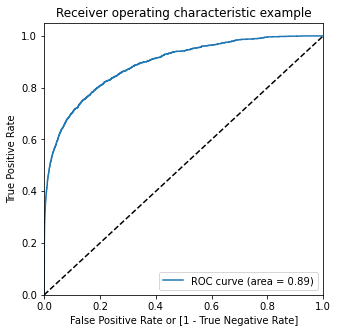

In [96]:
# Call the ROC function
draw_roc(y_train_pred_final.Buy, y_train_pred_final.Buy_Prob)

In [97]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Buy_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Buy,Buy_Prob,Predicted_Buy,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000718,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016867,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003850,0,1,0,0,0,0,0,0,0,0,0
3,0,0.027282,0,1,0,0,0,0,0,0,0,0,0
4,0,0.071747,0,1,0,0,0,0,0,0,0,0,0


In [98]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probablity','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Buy, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probablity,accuracy,sensitivity,specificity
0.0,0.0,0.051020,1.000000,0.000000
0.1,0.1,0.907382,0.675175,0.919867
0.2,0.2,0.949286,0.537538,0.971423
0.3,0.3,0.959654,0.449449,0.987084
0.4,0.4,0.962207,0.381381,0.993434
0.5,0.5,0.962386,0.329830,0.996394
0.6,0.6,0.962054,0.290290,0.998170
0.7,0.7,0.960879,0.251752,0.999004
0.8,0.8,0.959041,0.208709,0.999381
0.9,0.9,0.956487,0.152152,0.999731


In [100]:
# Making predictions using cut-off at 0.4 as accuracy is increasing till 0.4 and then decreasing after that.
y_train_pred_final['final_predicted'] = y_train_pred_final.Buy_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Buy,Buy_Prob,Predicted_Buy,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000718,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.016867,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003850,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.027282,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.071747,0,1,0,0,0,0,0,0,0,0,0,0


In [101]:
metrics.accuracy_score(y_train_pred_final.Buy, y_train_pred_final.final_predicted)

0.9622072980771686

In [102]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Buy, y_train_pred_final.final_predicted )
confusion2

array([[36919,   244],
       [ 1236,   762]], dtype=int64)

In [103]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [104]:
# Calculating the sensitivity
TP/(TP+FN)

0.3813813813813814

In [105]:
# Calculating the specificity
TN/(TN+FP)

0.9934343298441999

## 8. Prediction on Test set

In [106]:
leads_test = pd.read_csv("C:/Users/hp/Desktop/Analytics Vidhya/test_Wf7sxXF.csv")
leads_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [107]:
leads_test.shape

(13184, 18)

In [108]:
# Imputing the values in columns.
leads_test['signup_date'] = leads_test['signup_date'].fillna(leads_test['created_at'])

In [109]:
# Converting 'created_at' and 'signup_date' column to datetime object.
leads_test['created_at'] = pd.to_datetime(leads_test['created_at'], format = '%Y-%m-%d', errors = 'coerce')
leads_test['signup_date'] = pd.to_datetime(leads_test['signup_date'], format = '%Y-%m-%d', errors = 'coerce')

In [110]:
leads_test['days_after_signup']=leads_test['created_at']-leads_test['signup_date']

In [112]:
leads_test['days_after_signup']=leads_test['days_after_signup'].astype('timedelta64[D]')

In [113]:
leads_test['days_after_signup']=leads_test['days_after_signup'].astype('int')

In [114]:
leads_test['created_at_year'] = leads_test['created_at'].dt.year
leads_test['created_at_month'] = leads_test['created_at'].dt.month
leads_test['created_at_week'] = leads_test['created_at'].dt.week
leads_test['created_at_day'] = leads_test['created_at'].dt.day

In [115]:
# Imputing the values in columns.
leads_test['products_purchased'] = leads_test['products_purchased'].fillna(0)

In [116]:
leads_test.shape

(13184, 23)

In [117]:
# Substituting all the columns in the final train model
col = X_train.columns
col

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_4', 'user_activity_var_5',
       'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8',
       'user_activity_var_11', 'user_activity_var_12', 'created_at_week',
       'days_after_signup'],
      dtype='object')

In [118]:
X_test = leads_test[col]

In [119]:
X_test.shape

(13184, 13)

In [120]:
scaler = MinMaxScaler()
X_test[['campaign_var_1', 'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_11', 'created_at_week', 'days_after_signup']] = scaler.fit_transform(X_test[['campaign_var_1', 'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_11', 'created_at_week', 'days_after_signup']])
X_test.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_11,user_activity_var_12,created_at_week,days_after_signup
0,0.066667,0.071429,0.00,0.333333,0,0.0,0.333333,0.0,0.0,0.333333,0,1.0,0.092646
1,0.200000,0.428571,0.75,0.333333,0,0.0,0.000000,0.0,0.5,0.000000,0,1.0,0.280848
2,0.466667,0.428571,0.00,0.000000,0,0.5,0.333333,0.0,0.0,0.000000,0,1.0,0.035729
3,0.533333,0.500000,0.50,0.000000,0,0.5,0.333333,0.5,0.0,0.666667,0,1.0,0.267553
4,0.200000,0.285714,0.50,0.333333,0,0.0,0.000000,0.0,0.0,0.000000,0,1.0,0.159119


In [121]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_11,user_activity_var_12,created_at_week,days_after_signup
0,1.0,0.066667,0.071429,0.00,0.333333,0,0.0,0.333333,0.0,0.0,0.333333,0,1.000000,0.092646
1,1.0,0.200000,0.428571,0.75,0.333333,0,0.0,0.000000,0.0,0.5,0.000000,0,1.000000,0.280848
2,1.0,0.466667,0.428571,0.00,0.000000,0,0.5,0.333333,0.0,0.0,0.000000,0,1.000000,0.035729
3,1.0,0.533333,0.500000,0.50,0.000000,0,0.5,0.333333,0.5,0.0,0.666667,0,1.000000,0.267553
4,1.0,0.200000,0.285714,0.50,0.333333,0,0.0,0.000000,0.0,0.0,0.000000,0,1.000000,0.159119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,1.0,1.000000,0.785714,0.00,0.000000,0,0.0,0.333333,0.5,0.0,0.000000,0,0.235294,0.035729
13180,1.0,0.733333,0.500000,0.00,0.333333,0,0.0,0.333333,0.0,0.0,0.000000,0,0.235294,0.040299
13181,1.0,0.866667,0.928571,0.75,0.000000,0,0.0,0.000000,0.5,0.0,0.000000,0,0.235294,0.130037
13182,1.0,0.866667,0.642857,0.00,0.000000,0,0.0,0.000000,0.5,0.0,0.333333,0,0.235294,0.035729


In [122]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = model7.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df = y_pred_df.rename(columns = {0 : 'Buy_Prob'})
y_pred_df.head()

,Buy_Prob
0,0.298359
1,0.001007
2,0.014353
3,0.868564
4,0.010203


In [123]:
# Making prediction using cut off 0.4
y_pred_df['final_predicted'] = y_pred_df.Buy_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_df

,Buy_Prob,final_predicted
0,0.298359,0
1,0.001007,0
2,0.014353,0
3,0.868564,1
4,0.010203,0
...,...,...
13179,0.001097,0
13180,0.005255,0
13181,0.000749,0
13182,0.020118,0


## 9. Writing the predictions on test set in CSV file

In [124]:
submission = pd.concat([leads_test, y_pred_df], axis=1)
submission.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,days_after_signup,created_at_year,created_at_month,created_at_week,created_at_day,Buy_Prob,final_predicted
0,39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,...,0,1,0,137,2022,1,52,1,0.298359,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,...,0,0,0,590,2022,1,52,1,0.001007,0
2,39164,2022-01-01,8,7,0.0,2022-01-01,0,0,0,0,...,0,0,0,0,2022,1,52,1,0.014353,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,...,0,2,0,558,2022,1,52,1,0.868564,1
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,...,0,0,0,297,2022,1,52,1,0.010203,0


In [125]:
submission = submission[['id', 'final_predicted']]
submission.head()

,id,final_predicted
0,39162,0
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [126]:
submission = submission.rename(columns = {'final_predicted' : 'buy'})
submission.head()

,id,buy
0,39162,0
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [127]:
submission.shape

(13184, 2)

In [128]:
submission.to_csv("C:/Users/hp/Desktop/Analytics Vidhya/Submission_Saish.csv", index= False )